# **HY573**

**Name:** Konidakis Ioannis \\
**AM:** 1312

**Name:** Papadaki Katerina \\
**AM:** 1277

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from utils import *
import pywt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import ConvergenceWarning

## Download Dataset

In [3]:
'''
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Available folder options:
  - 'clean'
  - 'low_noise'
  - 'more_noise'
  - 'evenmore_noise'

Available file options:
  - 'nn_input_q_cs_39dcs'
  - 'nn_input_u_cs_39dcs'
  - 'nn_output_q_cs_39dcs'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
'''

# Example usage for downloading a dataset
choose_folder = 'more_noise'
choose_file = 'nn_input_u_cs_39dcs'
choose_folder_ = 'more_noise'
choose_file_ = 'nn_input_q_cs_39dcs'

# ~~~~~~~~~~ CHOOSE FOLDER 2 SHOULD ALWAYS BE CLEAN ~~~~~~~~~~
choose_folder_2 = 'clean'
choose_file_2 = 'nn_input_u_cs_39dcs'
choose_folder_2_ = 'clean'
choose_file_2_ = 'nn_input_q_cs_39dcs'

df_11 = download_data(choose_folder_2, choose_file_2)
df_12 = download_data(choose_folder_2_, choose_file_2_)
df_21 = download_data(choose_folder, choose_file)
df_22 = download_data(choose_folder_, choose_file_)

# Stack DataFrames as arrays
array_1 = np.vstack([df_11.values, df_12.values])
array_2 = np.vstack([df_21.values, df_22.values])

# Combine arrays vertically
combined_array = np.vstack([array_1, array_2])

# Create a new DataFrame from the combined array
df_1 = pd.DataFrame(array_1)
df_2 = pd.DataFrame(array_2)

# Display the combined DataFrame
print("Combined DataFrame 1 shape:", df_1.shape)
print("Combined DataFrame 2 shape:", df_2.shape)

Combined DataFrame 1 shape: (1246, 330)
Combined DataFrame 2 shape: (1246, 330)


## Visualize Dataset

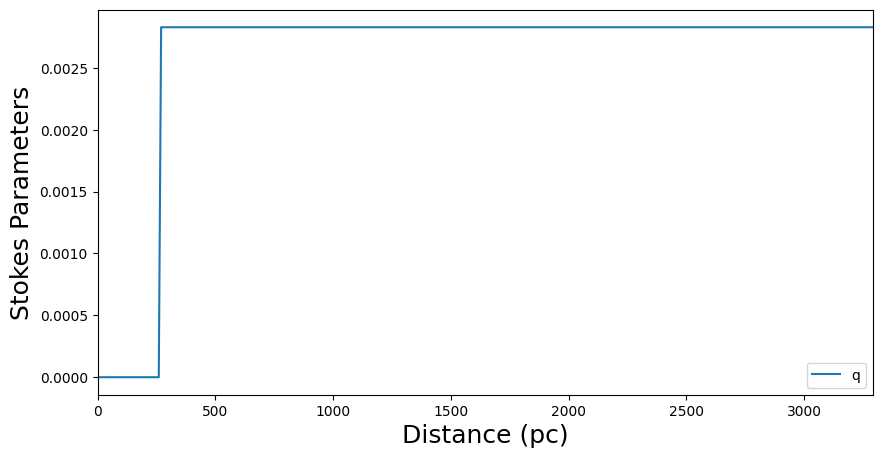

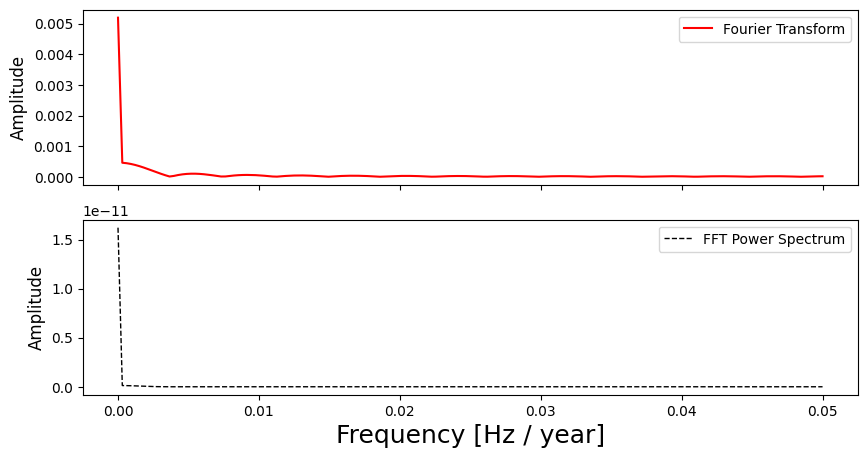

<ipython-input-3-3f53a302f0af>:23: UserWarning: The following kwargs were not used by contour: 'aspect'
  plt.contourf(time, period, power_q, levels=80, aspect='auto', vmax=power_q.max(), vmin=power_q.min())


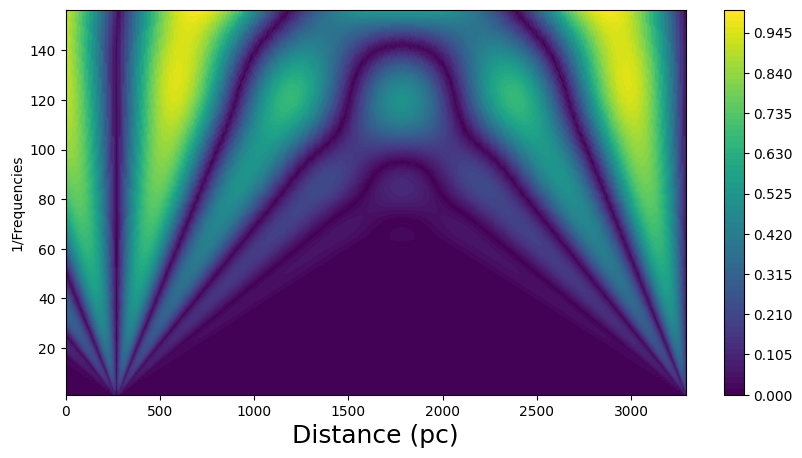

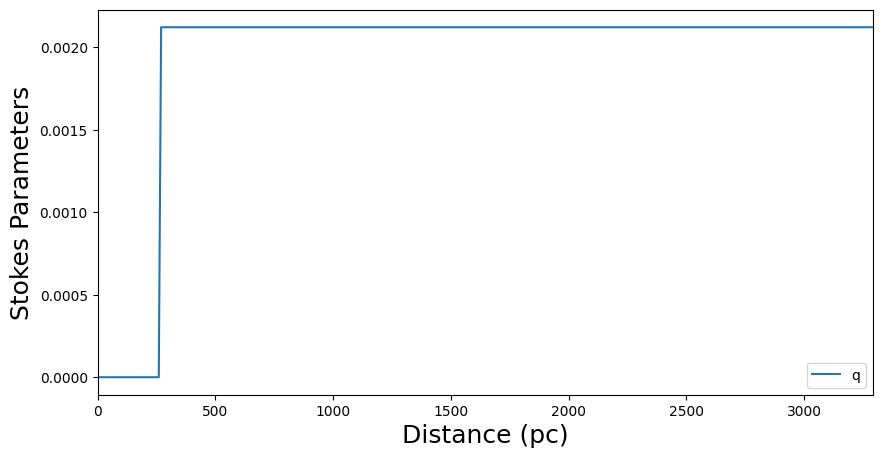

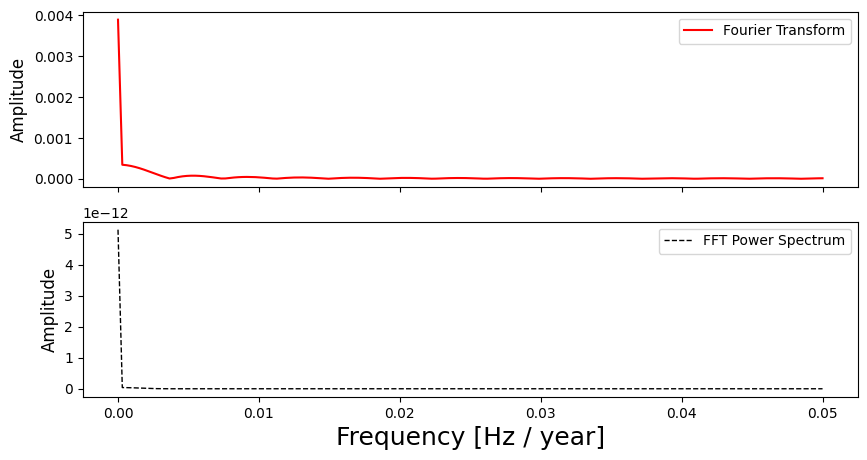

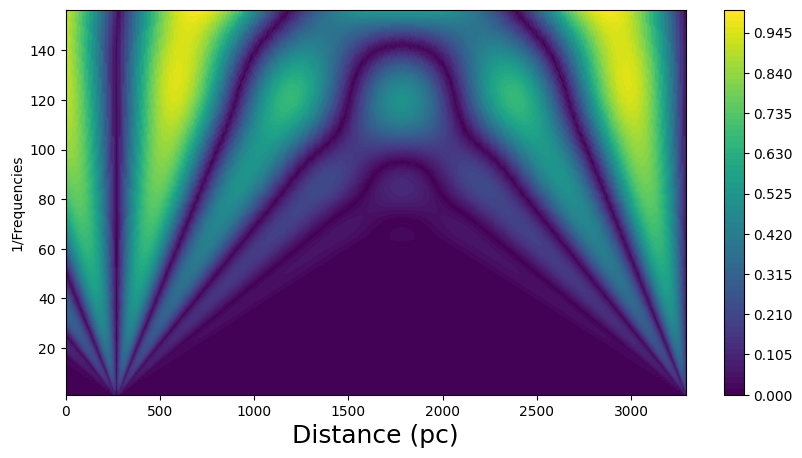

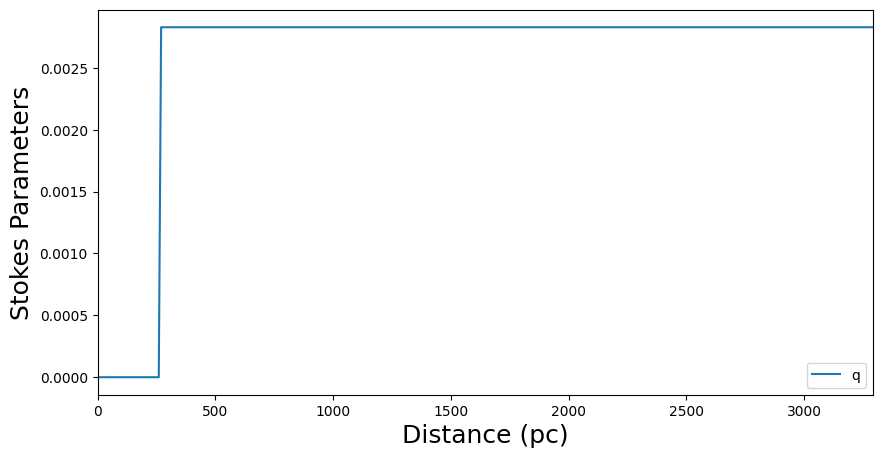

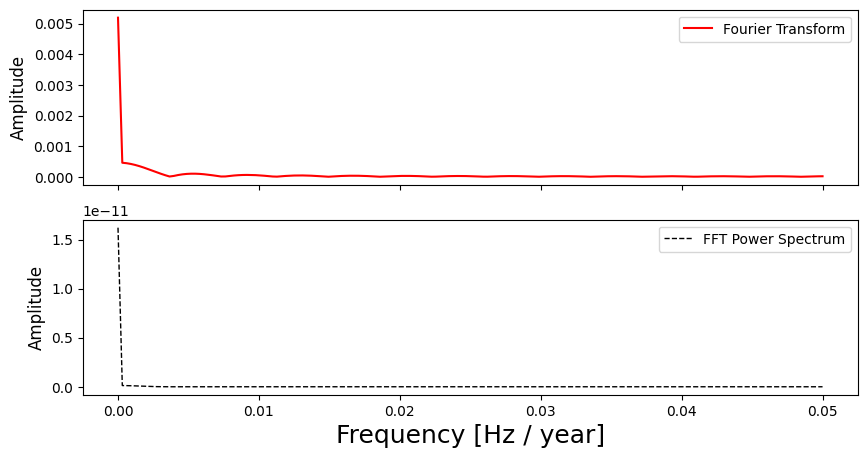

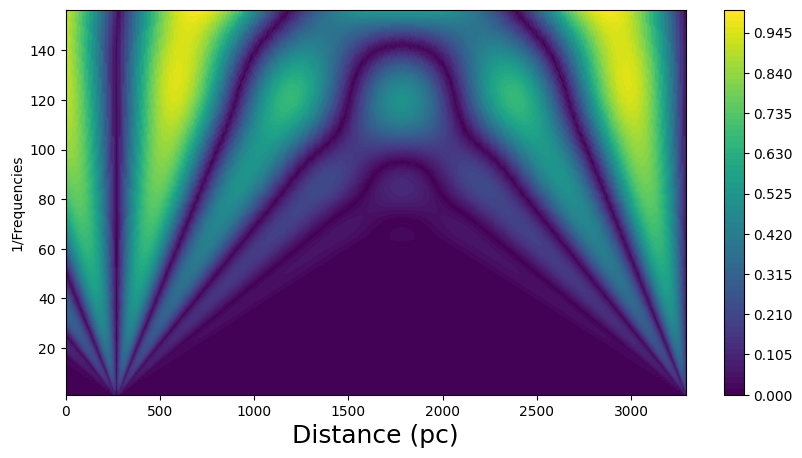

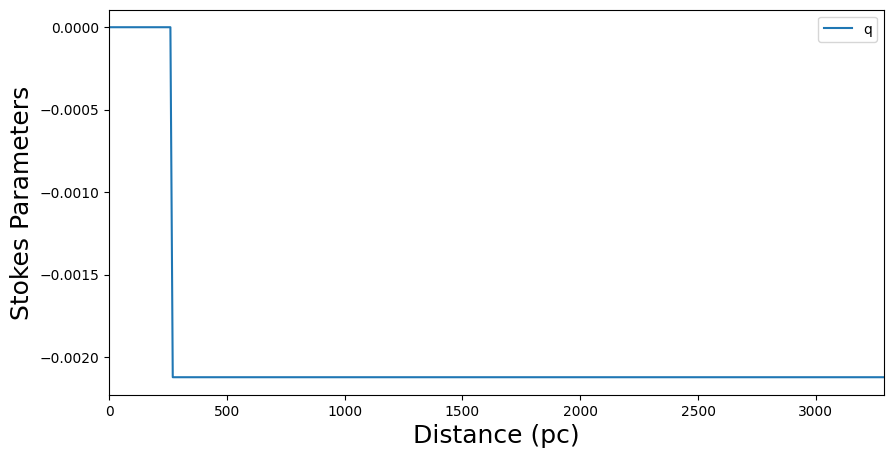

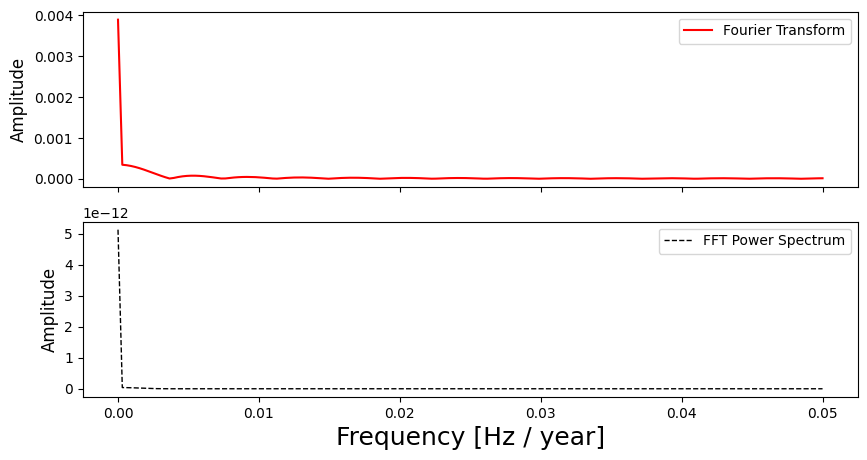

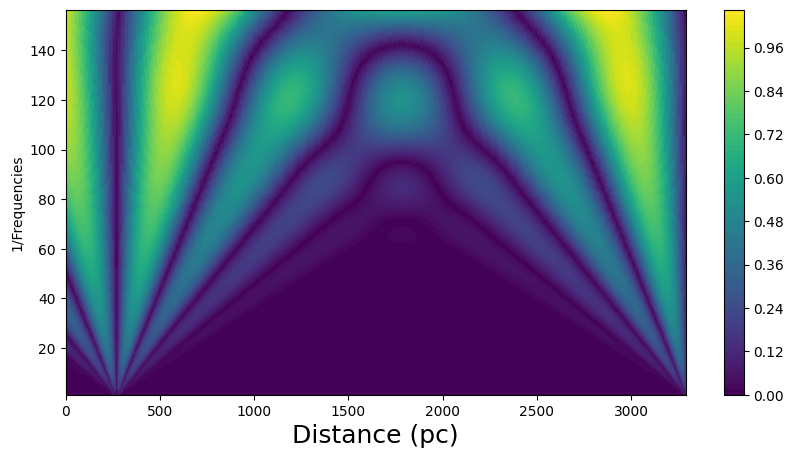

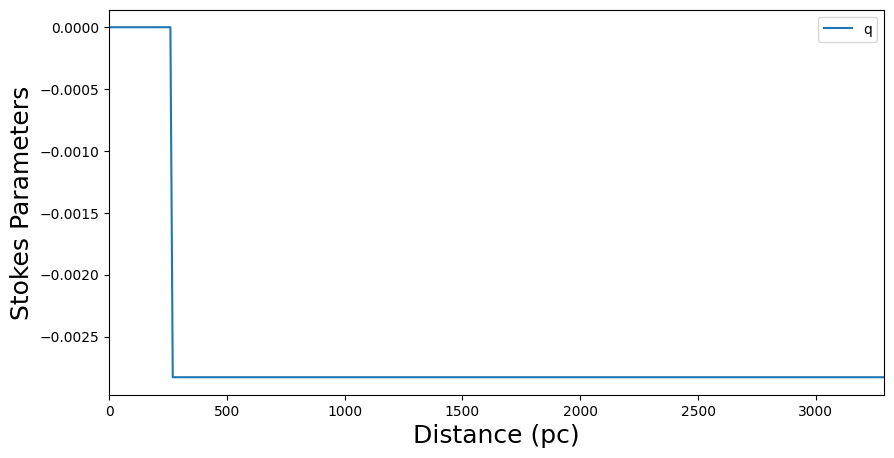

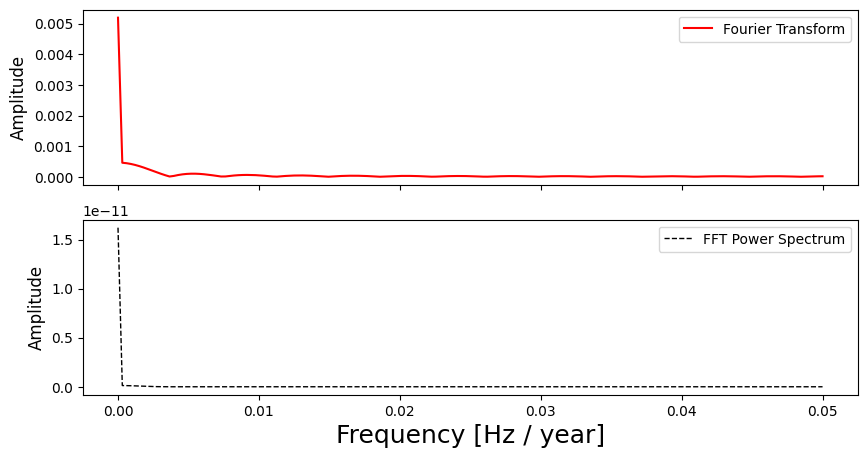

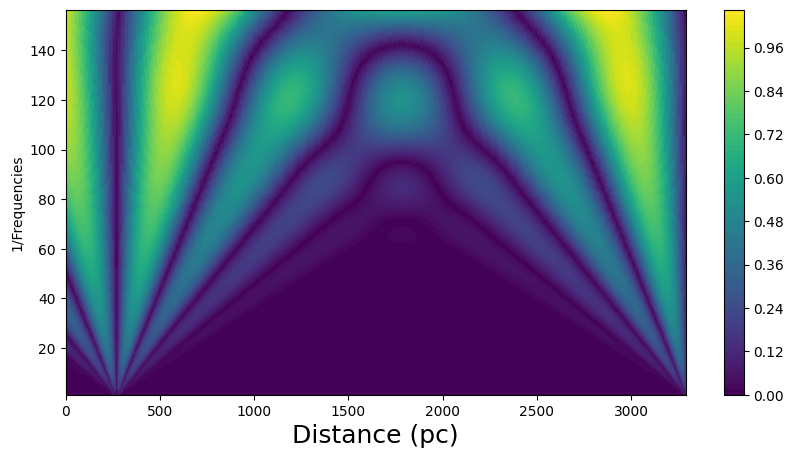

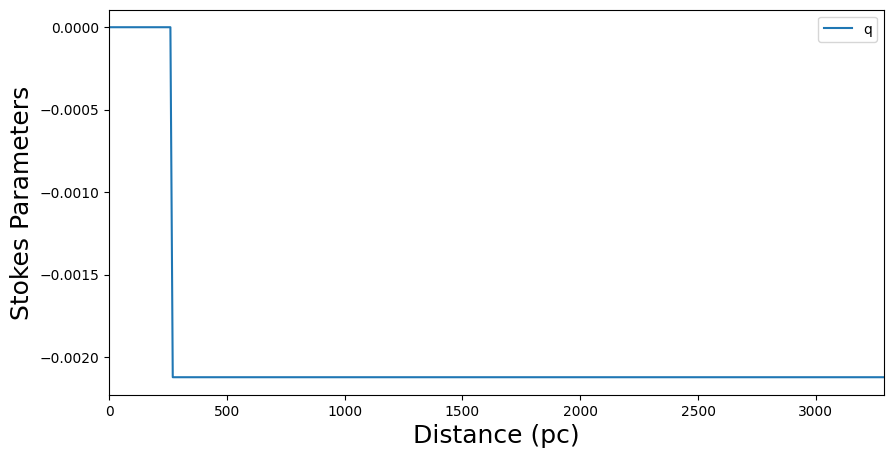

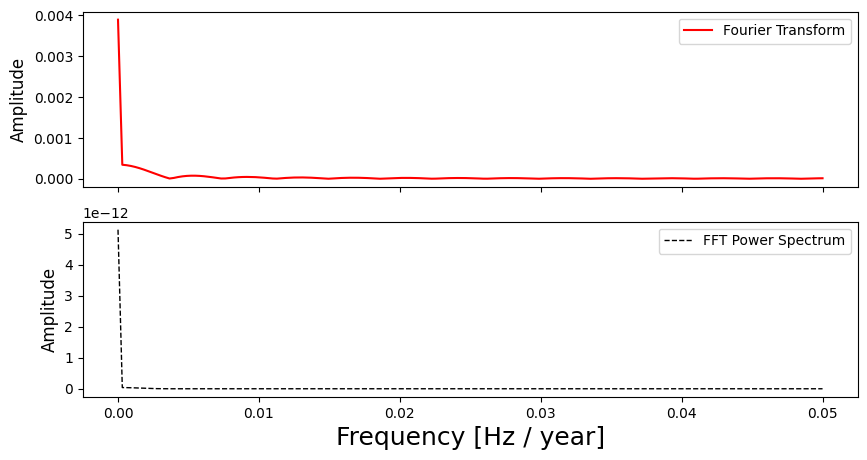

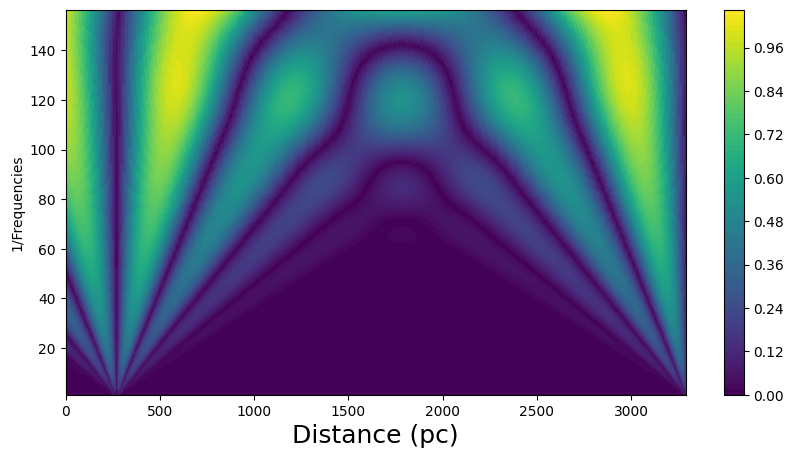

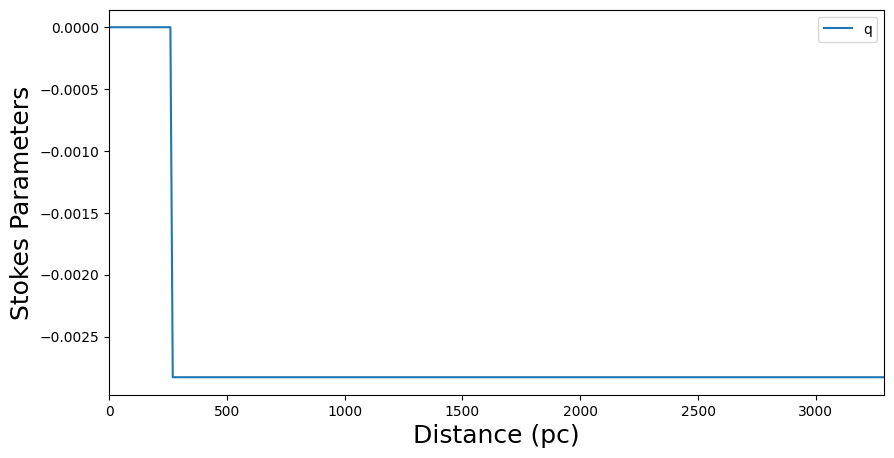

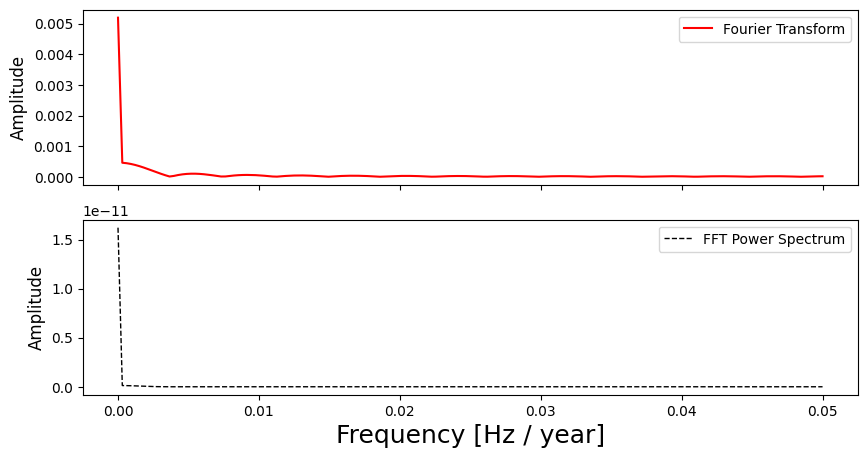

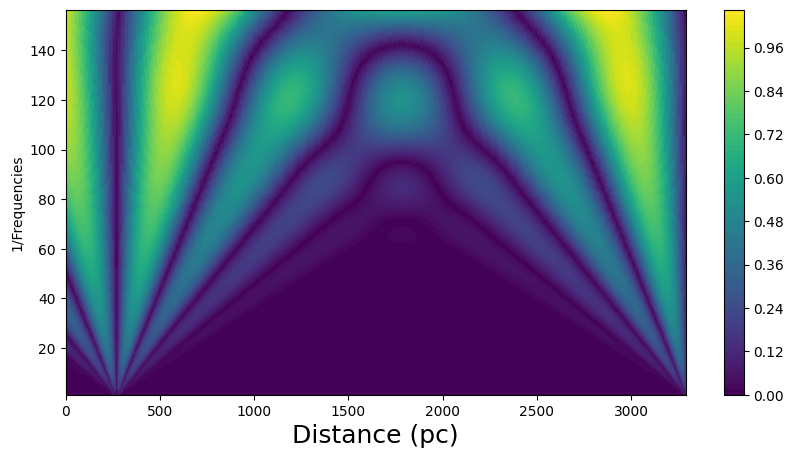

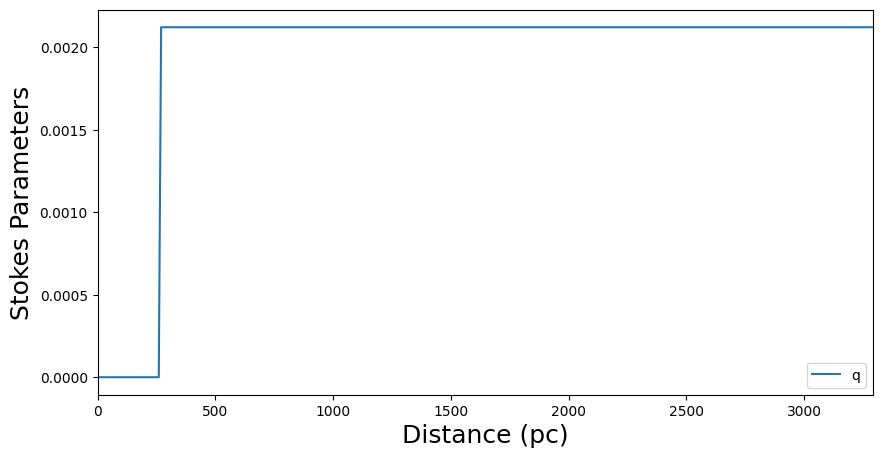

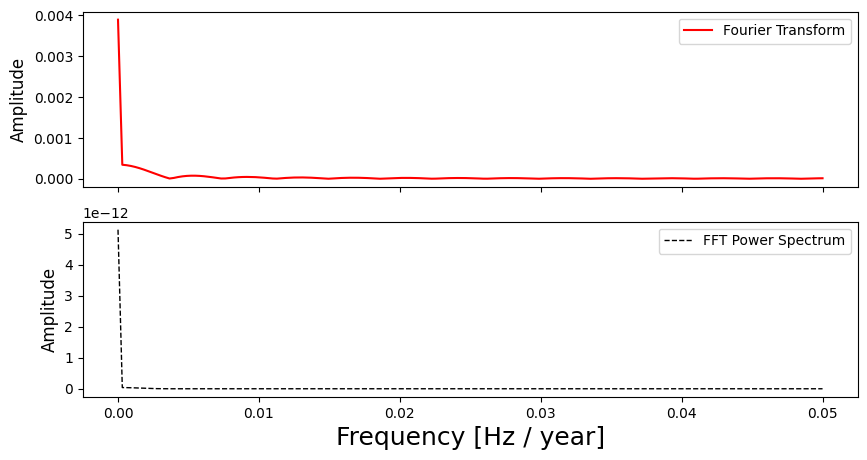

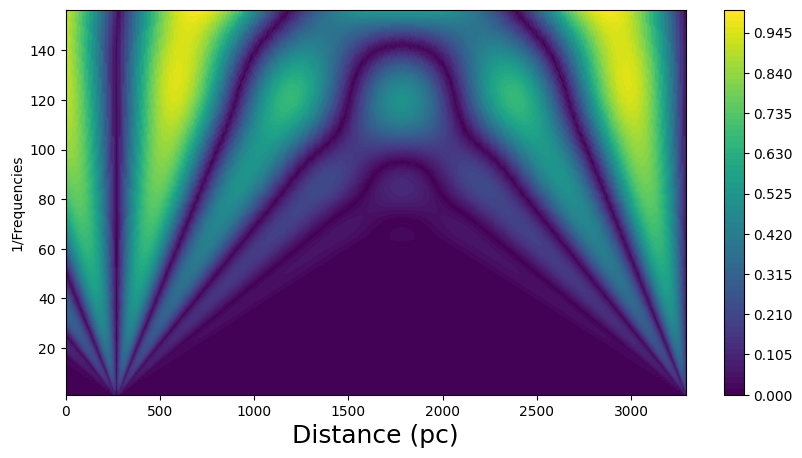

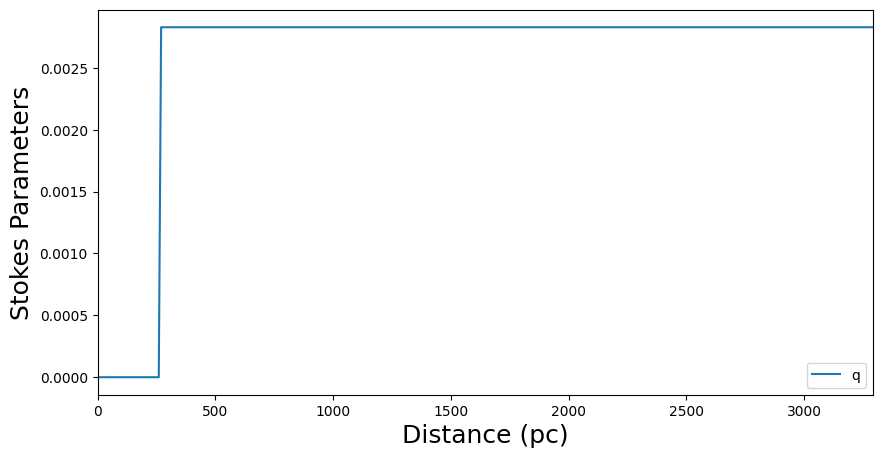

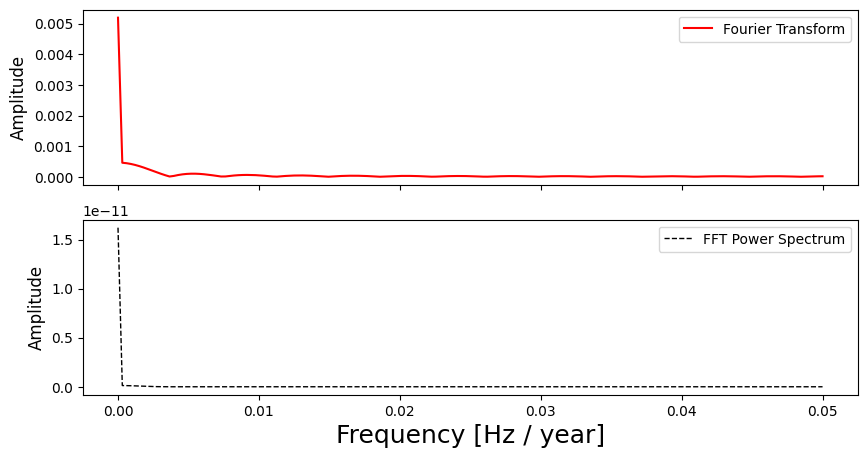

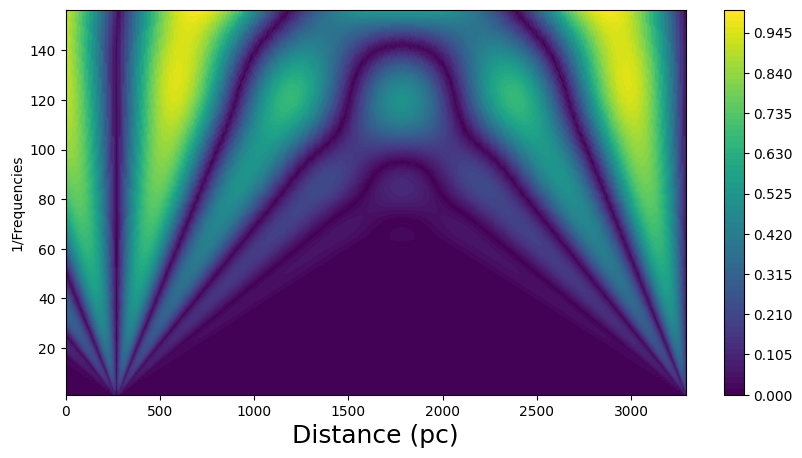

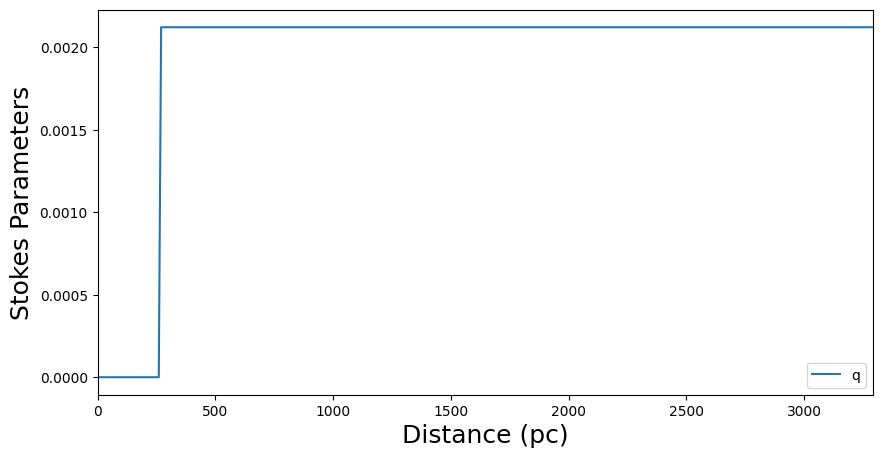

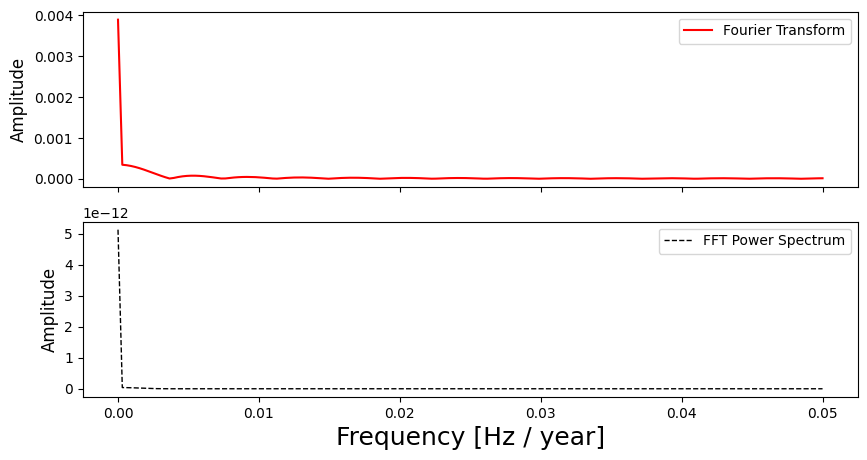

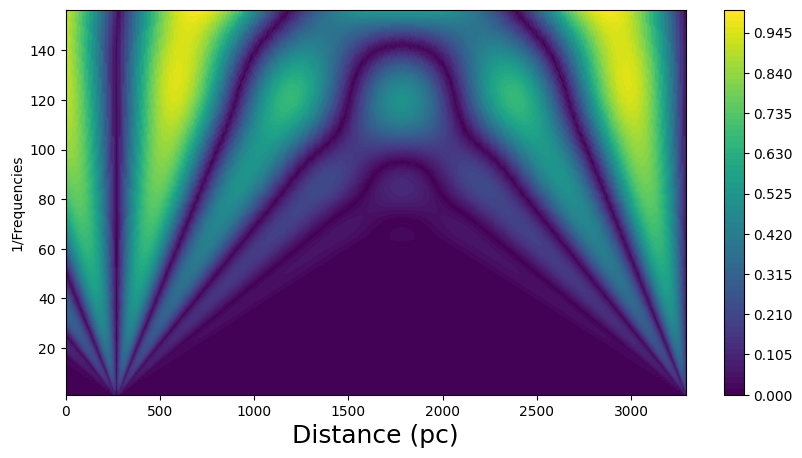

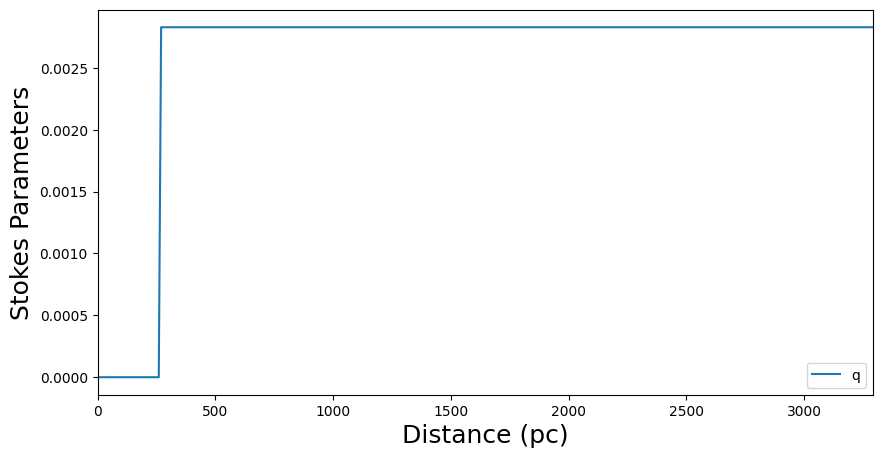

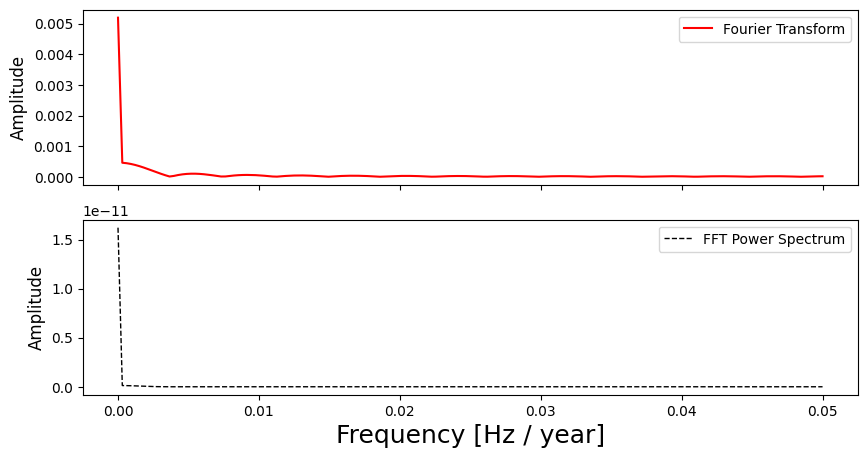

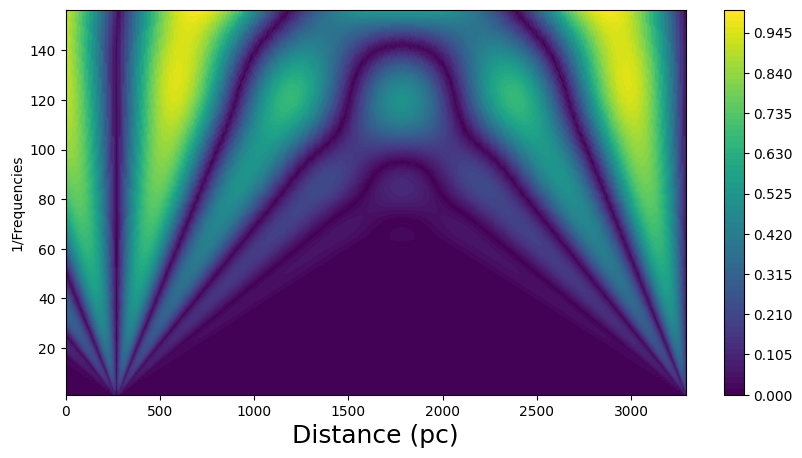

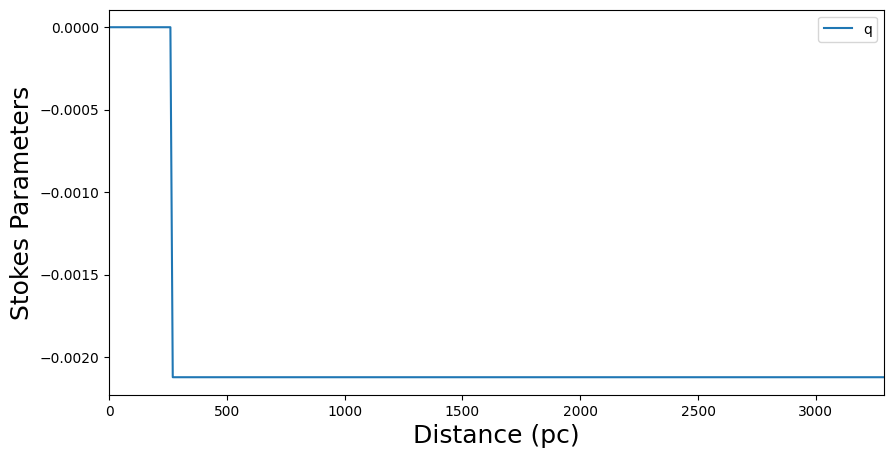

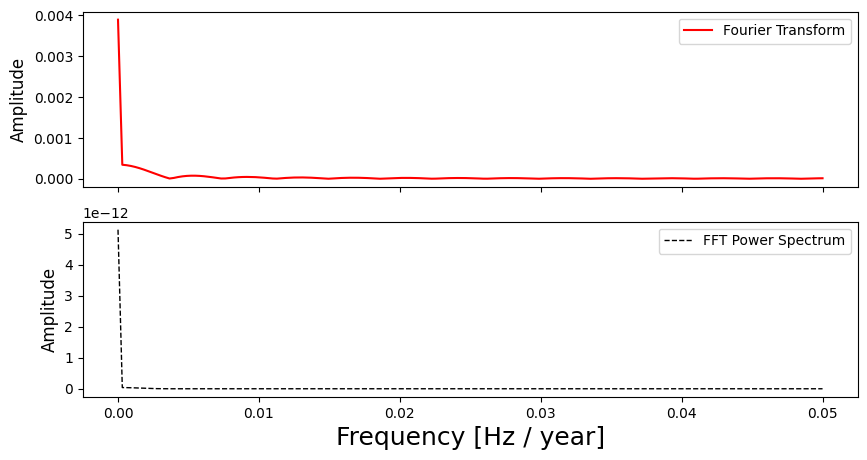

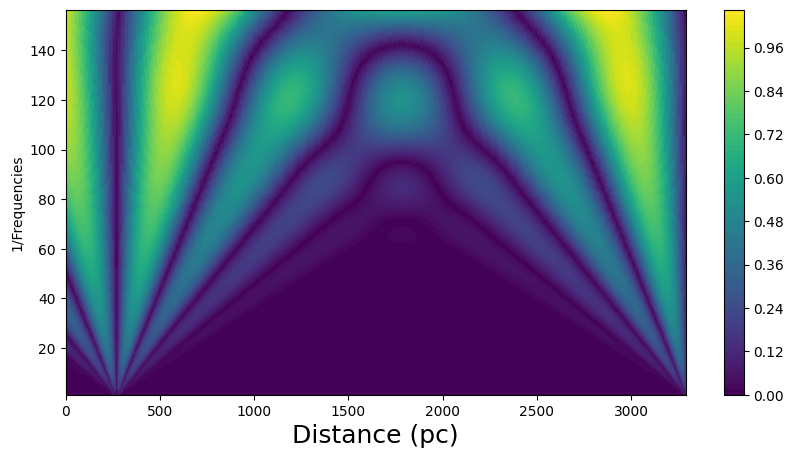

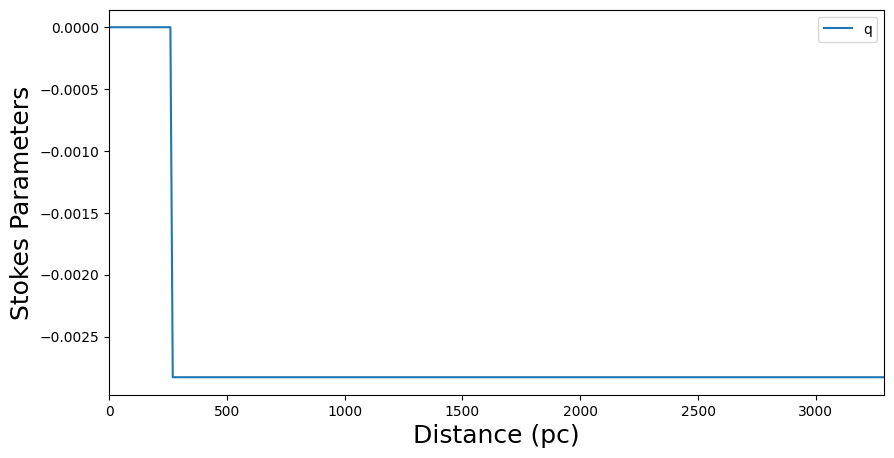

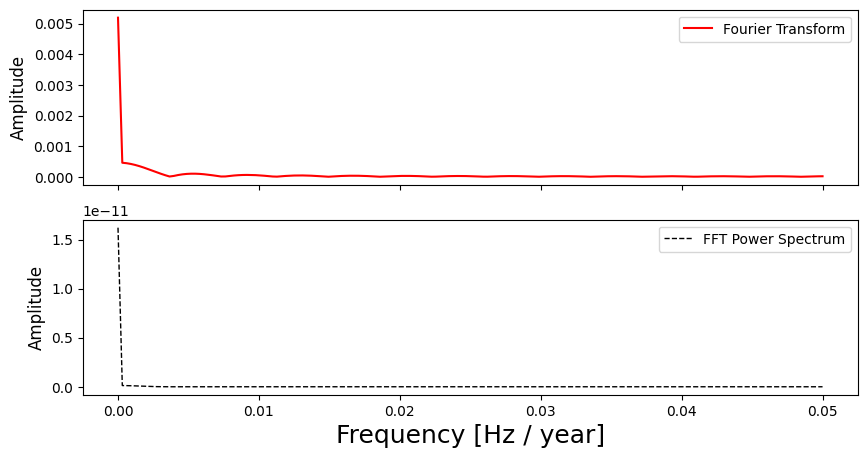

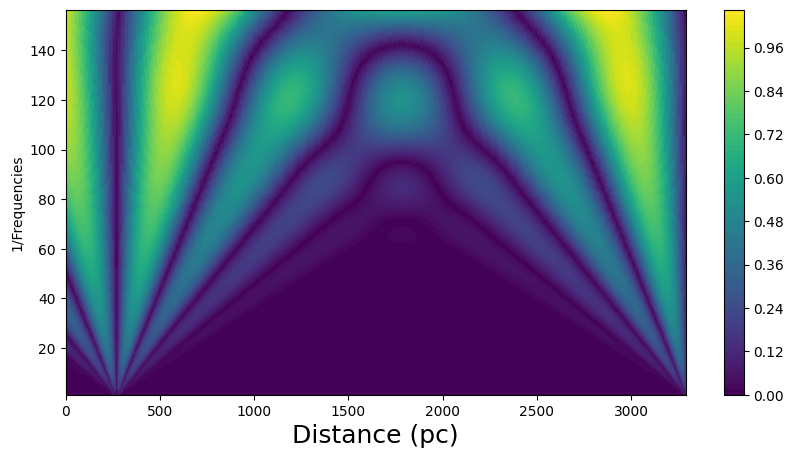

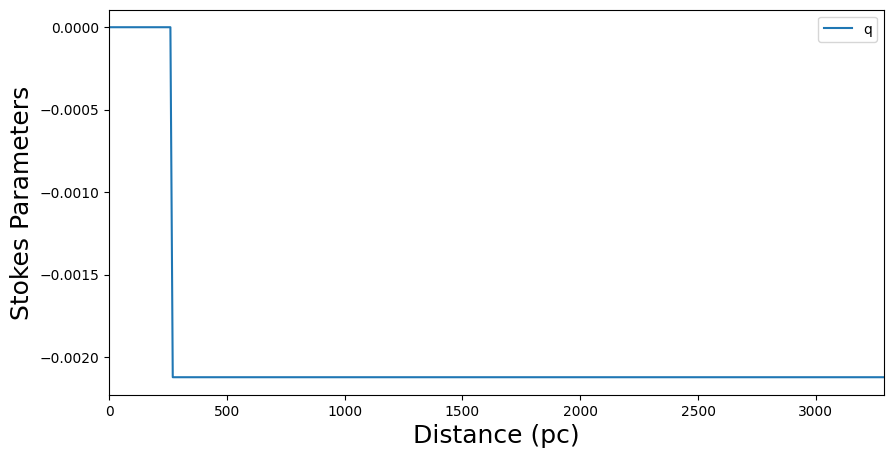

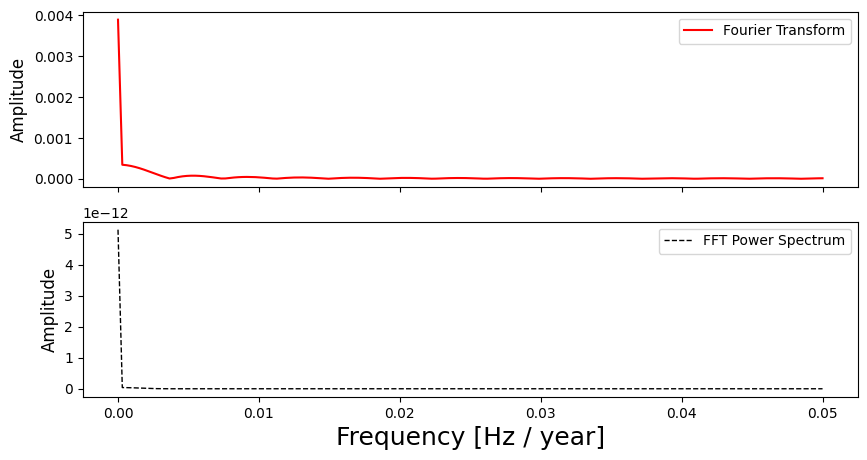

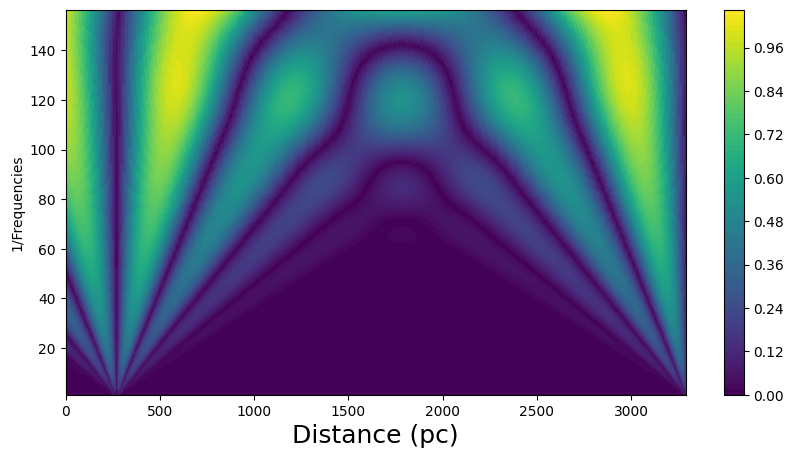

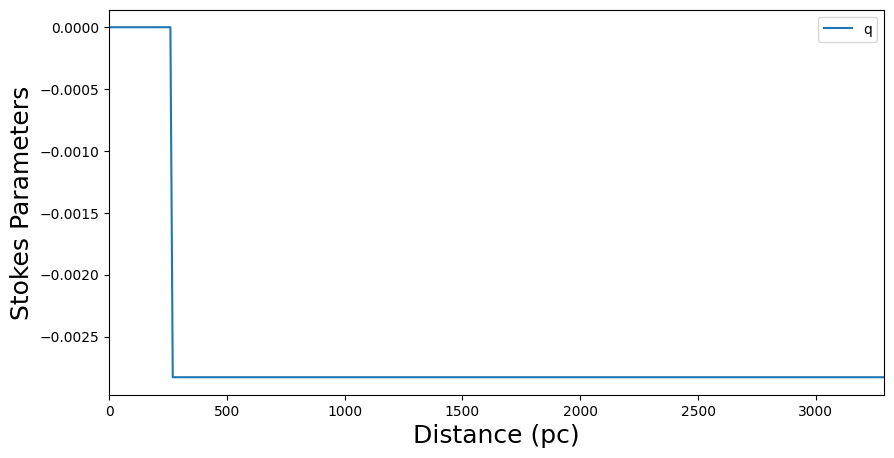

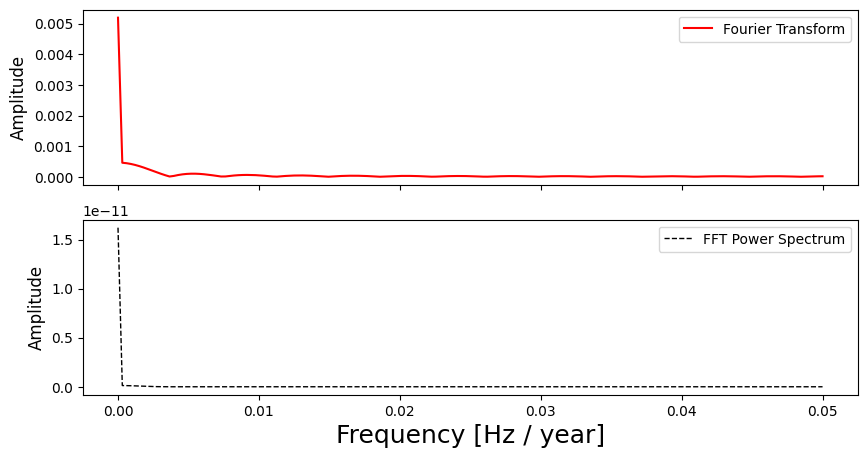

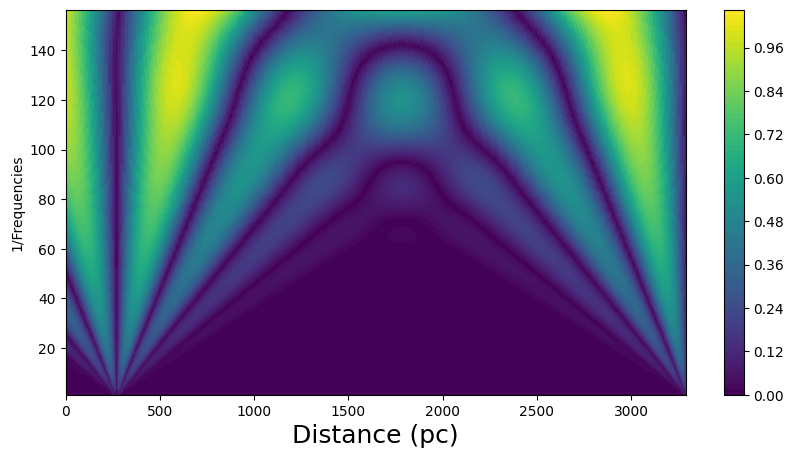

In [ ]:
signals = np.array(df_1)
N = signals.shape[1]
t0 = 0
dt = 10
time = np.arange(0, N) * dt + t0
scales = np.arange(1, 128)

powers_q, powers = [], []
for i in range(0, 15): #signals.shape[0]):
    q = signals[i, :]

    plot_signal(time, q) #plot and label the axis
    plot_fft_plus_power(time, q)

    [coefficients_q, frequencies_q] = pywt.cwt(q, scales, 'morl')

    power_q = abs(coefficients_q) /  abs(np.max(coefficients_q))
    powers_q.append(power_q)

    period = 1. / frequencies_q

    plt.figure(figsize=(10, 5))
    plt.contourf(time, period, power_q, levels=80, aspect='auto', vmax=power_q.max(), vmin=power_q.min())
    plt.xlabel('Distance (pc)', fontsize=18)
    plt.ylabel("1/Frequencies")
    plt.colorbar()
    plt.show()

## Training

### Train - Test Split

In [5]:
# Extract relevant columns from DataFrames and convert to NumPy arrays
data1 = df_1.copy().values
data2 = df_2.copy().values

# Set the random seed for reproducibility
random_seed = 42

# Split the datasets into train and test sets
data1_train, data1_test = train_test_split(data1, test_size=0.2, random_state=random_seed)
data2_train, data2_test = train_test_split(data2, test_size=0.2, random_state=random_seed)

# Transpose
data1_train = np.transpose(data1_train)
data1_test = np.transpose(data1_test)
data2_train = np.transpose(data2_train)
data2_test = np.transpose(data2_test)

# Normalize
data1_train = normalize_dict(data1_train)
data1_test = normalize_dict(data1_test)
data2_train = normalize_dict(data2_train)
data2_test = normalize_dict(data2_test)

# Display the shapes of the resulting sets
print("data1_train shape:", data1_train.shape)
print("data1_test shape:", data1_test.shape)
print("data2_train shape:", data2_train.shape)
print("data2_test shape:", data2_test.shape)

data1_train shape: (330, 996)
data1_test shape: (330, 250)
data2_train shape: (330, 996)
data2_test shape: (330, 250)


### Train

['Dictsize: ', {996}]
Before normalization: D_h.shape = (330, 996)
After normalization: D_h.shape = (330, 996)
Iteration 1 / 50 complete, RMSE1 = 0.9263915963060384, RMSE2 = 0.7877002441500517
Iteration 2 / 50 complete, RMSE1 = 0.9096615497723927, RMSE2 = 0.6827183919231143
Iteration 3 / 50 complete, RMSE1 = 0.6782371585345842, RMSE2 = 0.4834743047768741
Iteration 4 / 50 complete, RMSE1 = 0.37354081409415846, RMSE2 = 0.21227717052767467
Iteration 5 / 50 complete, RMSE1 = 0.09005911756923053, RMSE2 = 0.03906067632721784
Iteration 6 / 50 complete, RMSE1 = 0.029610298907406907, RMSE2 = 0.03582054318855123
Iteration 7 / 50 complete, RMSE1 = 0.01980816353728836, RMSE2 = 0.03230315009795626
Iteration 8 / 50 complete, RMSE1 = 0.017601424973720064, RMSE2 = 0.028741594613670568
Iteration 9 / 50 complete, RMSE1 = 0.01602141902417051, RMSE2 = 0.034067886417904814
Iteration 10 / 50 complete, RMSE1 = 0.01690757746779641, RMSE2 = 0.03225556881732829
Iteration 11 / 50 complete, RMSE1 = 0.022019596437

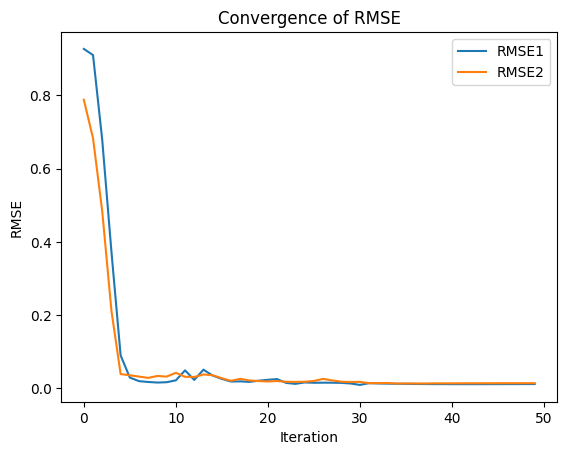

In [6]:
# Set parameters
dictsize = data1_train.shape[1]
iternum = 50

# Set parameters for ADMM_Coupled_DL function
params = {
    'data1': data1_train,
    'data2': data2_train,
    'dictsize': dictsize,
    'iternum': iternum
}

print(['Dictsize: ',{dictsize}])

# Call the ADMM_Coupled_DL function
D_h, D_l, P, Q, err1, err2 = ADMM_Coupled_DL(params)

# RMSE_1 is for noisy, RMSE_2 is for clean

# Plot the errors over iterations
plt.plot(range(iternum), err1, label='RMSE1')
plt.plot(range(iternum), err2, label='RMSE2')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.title('Convergence of RMSE')
plt.show()

## Testing with Lasso

In [12]:
Original_region_of_interest = data1_test
Mid_SNR_Noisy_region_of_interest = data2_test

D_clean_high_snr = D_h
D_noisy_high_snr = D_l

lasso_lambda = 1e-6 # Sparsity regularization term 1e-7: 0.06983204100199321, 12.284797766248962, 1e-6: 0.06787905283488223, 11.497483125736737 , 1e-5: 0.06629774946390232, 12.092826518311195
#print(np.max(np.abs(np.dot(D_l.T, Mid_SNR_Noisy_region_of_interest)))/D_l.shape[0])
# Suppress ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    # Perform Sc_Denoising (with lasso)
    reconstructed_signal_from_Mid_SNR = sc_denoising(Mid_SNR_Noisy_region_of_interest, D_clean_high_snr, D_noisy_high_snr, lasso_lambda)

# Calculate RMSE
Err = (Original_region_of_interest - reconstructed_signal_from_Mid_SNR)**2
rmse1 = np.sqrt(np.mean(Err))

# Print the final RMSE value
print(f"\n\nFinal RMSE: {rmse1}")

Denoising Progress: 100%|██████████| 250/250 [01:17<00:00,  3.23it/s]



Final RMSE: 0.23493445371213217


### Sample

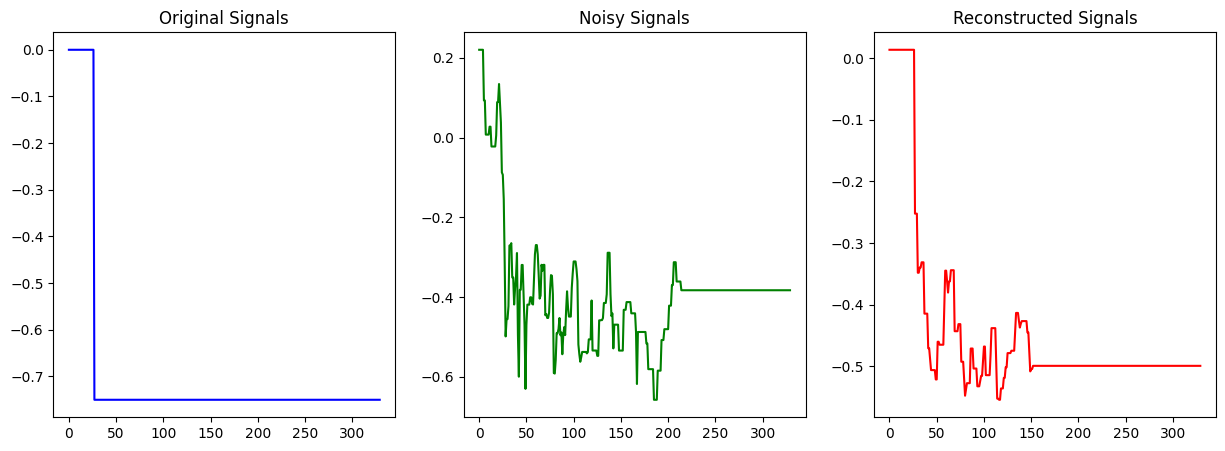

In [16]:
# Plot original and reconstructed signals
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(Original_region_of_interest[:, -1], 'b')
plt.title('Original Signals')

plt.subplot(1, 3, 2)
plt.plot(Mid_SNR_Noisy_region_of_interest[:, -1], 'g')
plt.title('Noisy Signals')

plt.subplot(1, 3, 3)
plt.plot(reconstructed_signal_from_Mid_SNR[:, -1], 'r')
plt.title('Reconstructed Signals')

plt.show()

### Compute Index of Change

In [14]:
original_signal = Original_region_of_interest
reconstructed_signal = reconstructed_signal_from_Mid_SNR
rmse_result, change_indices_original, change_indices_reconstructed = compute_rmse_between_change_indices(original_signal, reconstructed_signal)
print("\nRoot Mean Squared Error (RMSE):", rmse_result)
print("Mean Absolute Error:", np.mean(np.abs(change_indices_original-change_indices_reconstructed)))

Original Signal Change Index:
[51, 118, 129, 96, 96, 148, 113, 43, 32, 96, 93, 125, 113, 99, 129, 73, 116, 89, 79, 96, 69, 116, 139, 121, 150, 150, 73, 69, 148, 102, 125, 63, 76, 61, 30, 89, 116, 137, 148, 89, 116, 81, 107, 137, 113, 150, 133, 116, 86, 116, 149, 129, 102, 37, 146, 89, 93, 89, 118, 102, 51, 41, 41, 133, 133, 108, 137, 108, 53, 41, 96, 53, 53, 150, 146, 149, 102, 96, 43, 86, 113, 133, 32, 51, 63, 133, 32, 138, 149, 150, 51, 43, 148, 58, 139, 49, 37, 99, 116, 139, 93, 107, 89, 133, 69, 51, 148, 107, 139, 129, 149, 32, 58, 102, 137, 150, 150, 37, 41, 86, 30, 138, 69, 149, 49, 37, 108, 125, 125, 137, 129, 96, 118, 27, 148, 86, 150, 113, 58, 138, 51, 37, 129, 99, 37, 49, 89, 93, 61, 61, 73, 148, 96, 32, 129, 137, 58, 96, 121, 27, 113, 138, 49, 81, 81, 69, 96, 86, 61, 76, 113, 73, 93, 116, 150, 93, 79, 137, 129, 73, 79, 89, 27, 58, 102, 107, 41, 148, 138, 125, 149, 107, 121, 89, 37, 49, 76, 113, 107, 37, 53, 99, 107, 150, 116, 41, 139, 58, 53, 148, 93, 96, 89, 121, 86, 139, 4

## Testing with Elastic Net

In [ ]:
Original_region_of_interest = data1_test
Mid_SNR_Noisy_region_of_interest = data2_test

D_clean_high_snr = D_h
D_noisy_high_snr = D_l

alpha = 1e-6 # regularization strength
l1_ratio = 0.5 # mix between l1 and l2, 0 corresponds to ridge, 1 corresponds to lasso
# Sparsity regularization term 1e-7: 0.06983204100199321, 12.284797766248962, 1e-6: 0.06787905283488223, 11.497483125736737 , 1e-5: 0.06629774946390232, 12.092826518311195
#print(np.max(np.abs(np.dot(D_l.T, Mid_SNR_Noisy_region_of_interest)))/D_l.shape[0])
# Suppress ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    reconstructed_signal_from_Mid_SNR = sc_denoising_elastic_net(Mid_SNR_Noisy_region_of_interest, D_clean_high_snr, D_noisy_high_snr, alpha, l1_ratio)

# Calculate RMSE
Err = (Original_region_of_interest - reconstructed_signal_from_Mid_SNR)**2
rmse1 = np.sqrt(np.mean(Err))

# Print the final RMSE value
print(f"\n\nFinal RMSE: {rmse1}")

Denoising Progress: 100%|██████████| 250/250 [01:14<00:00,  3.34it/s]



Final RMSE: 0.20387275968692198


### Sample

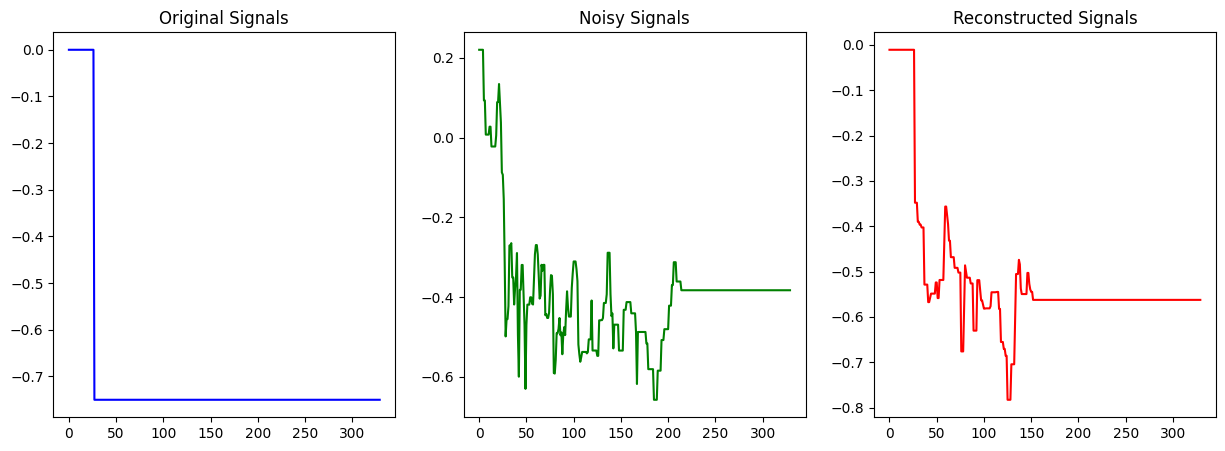

In [ ]:
# Plot original and reconstructed signals
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(Original_region_of_interest[:, -1], 'b')
plt.title('Original Signals')

plt.subplot(1, 3, 2)
plt.plot(Mid_SNR_Noisy_region_of_interest[:, -1], 'g')
plt.title('Noisy Signals')

plt.subplot(1, 3, 3)
plt.plot(reconstructed_signal_from_Mid_SNR[:, -1], 'r')
plt.title('Reconstructed Signals')

plt.show()

### Compute Index of Change

In [ ]:
original_signal = Original_region_of_interest
reconstructed_signal = reconstructed_signal_from_Mid_SNR
rmse_result, change_indices_original, change_indices_reconstructed = compute_rmse_between_change_indices(original_signal, reconstructed_signal)
print("\nRoot Mean Squared Error (RMSE):", rmse_result)
print("Mean Absolute Error:", np.mean(np.abs(change_indices_original-change_indices_reconstructed)))

Original Signal Change Index:
[51, 118, 129, 96, 96, 148, 113, 43, 32, 96, 93, 125, 113, 99, 129, 73, 116, 89, 79, 96, 69, 116, 139, 121, 150, 150, 73, 69, 148, 102, 125, 63, 76, 61, 30, 89, 116, 137, 148, 89, 116, 81, 107, 137, 113, 150, 133, 116, 86, 116, 149, 129, 102, 37, 146, 89, 93, 89, 118, 102, 51, 41, 41, 133, 133, 108, 137, 108, 53, 41, 96, 53, 53, 150, 146, 149, 102, 96, 43, 86, 113, 133, 32, 51, 63, 133, 32, 138, 149, 150, 51, 43, 148, 58, 139, 49, 37, 99, 116, 139, 93, 107, 89, 133, 69, 51, 148, 107, 139, 129, 149, 32, 58, 102, 137, 150, 150, 37, 41, 86, 30, 138, 69, 149, 49, 37, 108, 125, 125, 137, 129, 96, 118, 27, 148, 86, 150, 113, 58, 138, 51, 37, 129, 99, 37, 49, 89, 93, 61, 61, 73, 148, 96, 32, 129, 137, 58, 96, 121, 27, 113, 138, 49, 81, 81, 69, 96, 86, 61, 76, 113, 73, 93, 116, 150, 93, 79, 137, 129, 73, 79, 89, 27, 58, 102, 107, 41, 148, 138, 125, 149, 107, 121, 89, 37, 49, 76, 113, 107, 37, 53, 99, 107, 150, 116, 41, 139, 58, 53, 148, 93, 96, 89, 121, 86, 139, 4

## Iterative Testing to find best parameters

In [20]:
# Set the range of alpha and l1_ratio values
alpha_values = np.logspace(-5, 0.6, 8)
l1_ratio_values = np.linspace(0, 1, 10)

# Perform iterative denoising
results = sc_denoising_elastic_net_iterative(Mid_SNR_Noisy_region_of_interest, Original_region_of_interest, D_clean_high_snr, D_noisy_high_snr, alpha_values, l1_ratio_values)

# Find the result with the minimum RMSE
best_result = min(results, key=lambda x: x[2])

# Print the best result
print(f"\nBest Result - Alpha: {best_result[0]}, L1 Ratio: {best_result[1]}, RMSE: {best_result[2]}")

# Access the denoised signal corresponding to the best result
reconstructed_signal_from_Mid_SNR_best = best_result[3]
#0.1, 0

Denoising Progress:  14%|█▍        | 35/250 [00:13<01:24,  2.55it/s]


KeyboardInterrupt: 

## Testing for best parameters

In [19]:
Original_region_of_interest = data1_test
Mid_SNR_Noisy_region_of_interest = data2_test

D_clean_high_snr = D_h
D_noisy_high_snr = D_l

# Comment if you run Iterative testing
best_result = np.zeros(2)
best_result[0] = 1e-5
best_result[1] = 0.9

alpha = best_result[0] # regularization strength
l1_ratio = best_result[1] # mix between l1 and l2, 0 corresponds to ridge, 1 corresponds to lasso
# Sparsity regularization term 1e-7: 0.06983204100199321, 12.284797766248962, 1e-6: 0.06787905283488223, 11.497483125736737 , 1e-5: 0.06629774946390232, 12.092826518311195
#print(np.max(np.abs(np.dot(D_l.T, Mid_SNR_Noisy_region_of_interest)))/D_l.shape[0])
# Suppress ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    reconstructed_signal_from_Mid_SNR = sc_denoising_elastic_net(Mid_SNR_Noisy_region_of_interest, D_clean_high_snr, D_noisy_high_snr, alpha, l1_ratio)

# Calculate RMSE
Err = (Original_region_of_interest - reconstructed_signal_from_Mid_SNR)**2
rmse1 = np.sqrt(np.mean(Err))

# Print the final RMSE value
print(f"\n\nFinal RMSE: {rmse1}")

Denoising Progress: 100%|██████████| 250/250 [01:01<00:00,  4.04it/s]



Final RMSE: 0.23154156423338748


### Sample

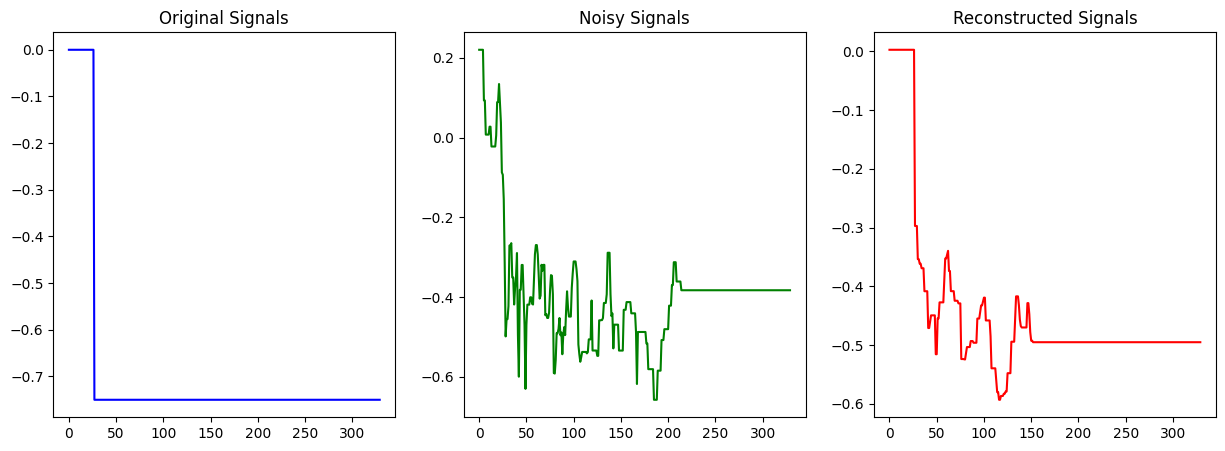

In [21]:
# Plot original and reconstructed signals
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(Original_region_of_interest[:, -1], 'b')
plt.title('Original Signals')

plt.subplot(1, 3, 2)
plt.plot(Mid_SNR_Noisy_region_of_interest[:, -1], 'g')
plt.title('Noisy Signals')

plt.subplot(1, 3, 3)
plt.plot(reconstructed_signal_from_Mid_SNR[:, -1], 'r')
plt.title('Reconstructed Signals')

plt.show()

### Compute Index of Change

In [22]:
original_signal = Original_region_of_interest
reconstructed_signal = reconstructed_signal_from_Mid_SNR
rmse_result, change_indices_original, change_indices_reconstructed = compute_rmse_between_change_indices(original_signal, reconstructed_signal)
print("\nRoot Mean Squared Error (RMSE):", rmse_result)
print("Mean Absolute Error:", np.mean(np.abs(change_indices_original-change_indices_reconstructed)))

Original Signal Change Index:
[51, 118, 129, 96, 96, 148, 113, 43, 32, 96, 93, 125, 113, 99, 129, 73, 116, 89, 79, 96, 69, 116, 139, 121, 150, 150, 73, 69, 148, 102, 125, 63, 76, 61, 30, 89, 116, 137, 148, 89, 116, 81, 107, 137, 113, 150, 133, 116, 86, 116, 149, 129, 102, 37, 146, 89, 93, 89, 118, 102, 51, 41, 41, 133, 133, 108, 137, 108, 53, 41, 96, 53, 53, 150, 146, 149, 102, 96, 43, 86, 113, 133, 32, 51, 63, 133, 32, 138, 149, 150, 51, 43, 148, 58, 139, 49, 37, 99, 116, 139, 93, 107, 89, 133, 69, 51, 148, 107, 139, 129, 149, 32, 58, 102, 137, 150, 150, 37, 41, 86, 30, 138, 69, 149, 49, 37, 108, 125, 125, 137, 129, 96, 118, 27, 148, 86, 150, 113, 58, 138, 51, 37, 129, 99, 37, 49, 89, 93, 61, 61, 73, 148, 96, 32, 129, 137, 58, 96, 121, 27, 113, 138, 49, 81, 81, 69, 96, 86, 61, 76, 113, 73, 93, 116, 150, 93, 79, 137, 129, 73, 79, 89, 27, 58, 102, 107, 41, 148, 138, 125, 149, 107, 121, 89, 37, 49, 76, 113, 107, 37, 53, 99, 107, 150, 116, 41, 139, 58, 53, 148, 93, 96, 89, 121, 86, 139, 4